In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

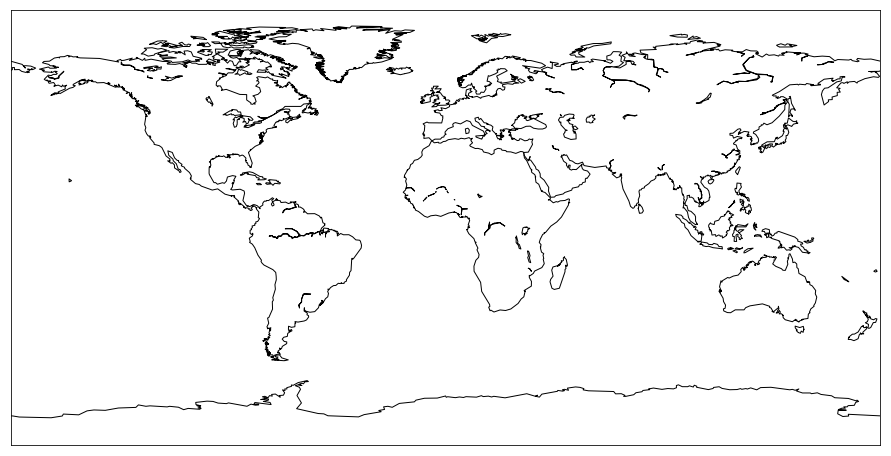

In [2]:
plt.figure(figsize=(16, 8))
# 生成地图对象
m = Basemap()
# 绘制海岸线
m.drawcoastlines()
plt.show()

现在开始画上国家

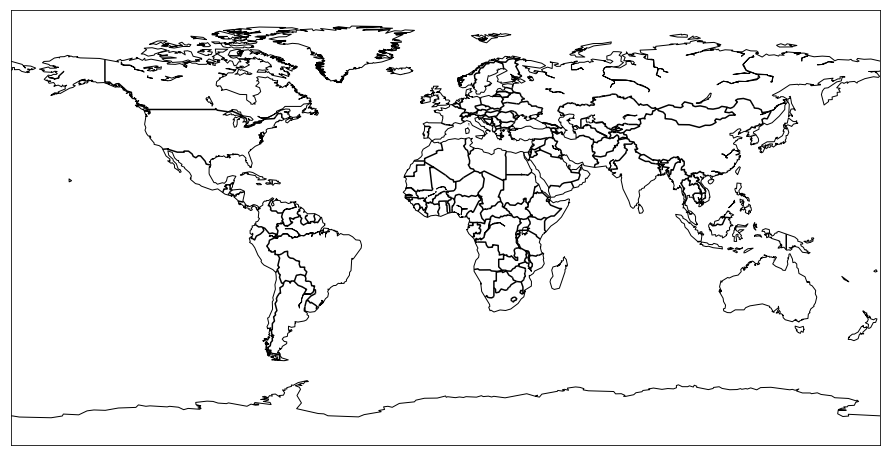

In [7]:
plt.figure(figsize=(16, 8))
# 生成地图对象
m = Basemap()
# 绘制海岸线
m.drawcoastlines()
m.drawcountries(linewidth=1.5)
plt.show()

如果我们想显示中国地图，只需要在创建Basemap时指定一下经纬度就行了

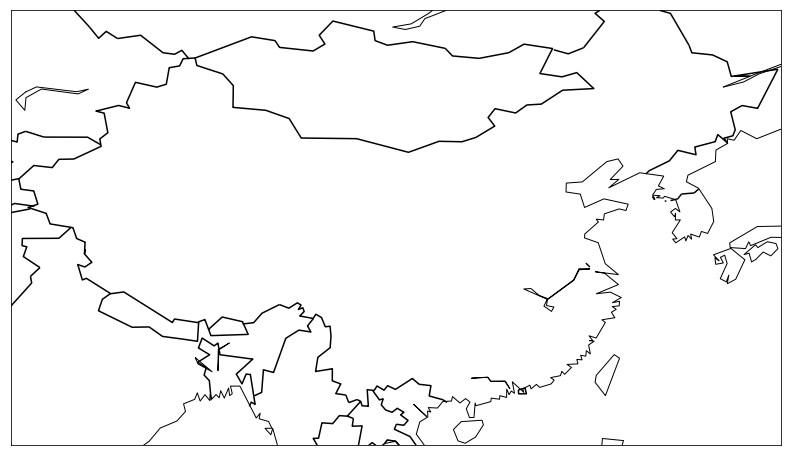

In [8]:
plt.figure(figsize=(16, 8))
# 生成地图对象
m = Basemap(llcrnrlon=73, llcrnrlat=18, urcrnrlon=135, urcrnrlat=53)
# 绘制海岸线
m.drawcoastlines()
m.drawcountries(linewidth=1.5)
plt.show()

看上去有点变形，这是因为我们没有添加任何投影的原因，Basemap提供24种不同的投影方式，你可以自己一个个试一下，比较常用的是兰勃特投影，我们添加一下

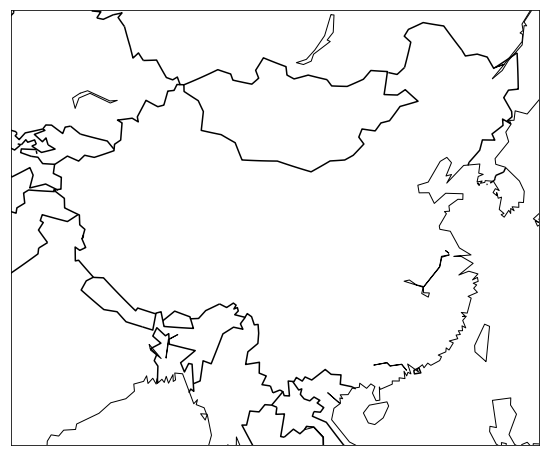

In [9]:
plt.figure(figsize=(16, 8))
# 生成地图对象
m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
# 绘制海岸线
m.drawcoastlines()
# 绘制国家
m.drawcountries(linewidth=1.5)
plt.show()

这次看上去，地图就比较正常了

我们想加上省的边界怎么办呢？Basemap缺省的包里没有中国的省区，只有美国的州，毕竟是美国人做的嘛。不过好在世界很大，有专门的国际组织干这事，在这里 (https://gadm.org/download_country_v3.html) 你可以下载全世界任何一个国家的行政区划Shape文件，然后我们给它加上：

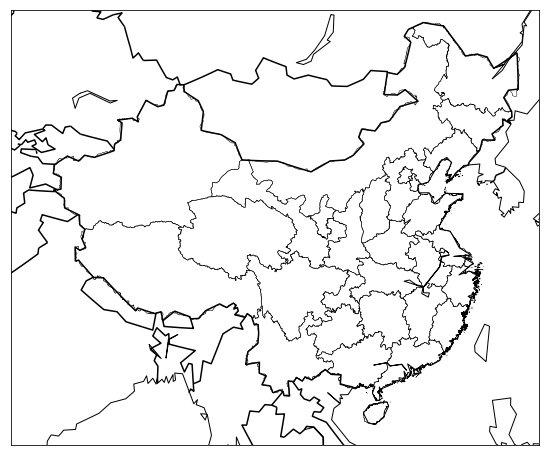

In [14]:
plt.figure(figsize=(16, 8))
# 生成地图对象
m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
# 绘制海岸线
m.drawcoastlines()
# 读取行政区划分shape文件
m.readshapefile('gadm36_CHN_shp/gadm36_CHN_1', 'states', drawbounds=True)
# 绘制国家
m.drawcountries(linewidth=1.5)
plt.show()

再将各个省划分

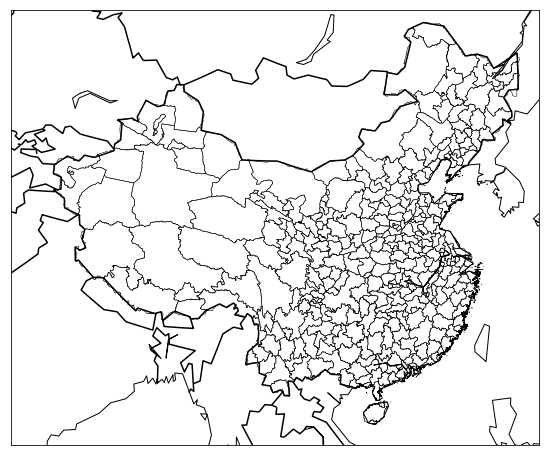

In [17]:
plt.figure(figsize=(16, 8))
# 生成地图对象
m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
# 绘制海岸线
m.drawcoastlines()
# 读取行政区划分shape文件
m.readshapefile('gadm36_CHN_shp/gadm36_CHN_2', 'states', drawbounds=True)
# 绘制国家
m.drawcountries(linewidth=1.5)
plt.show()

再将各个市划分

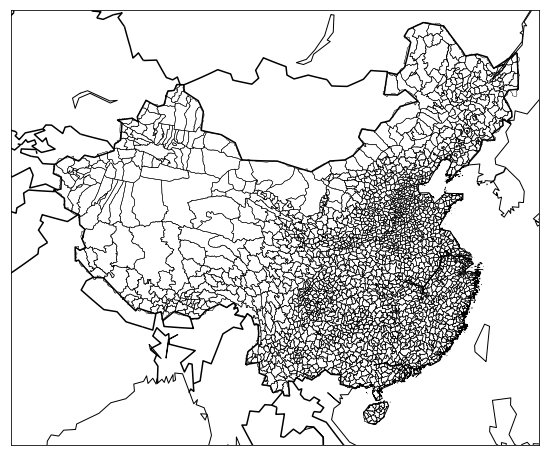

In [18]:
plt.figure(figsize=(16, 8))
# 生成地图对象
m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
# 绘制海岸线
m.drawcoastlines()
# 读取行政区划分shape文件
m.readshapefile('gadm36_CHN_shp/gadm36_CHN_3', 'states', drawbounds=True)
# 绘制国家
m.drawcountries(linewidth=1.5)
plt.show()

接下来给地图上色

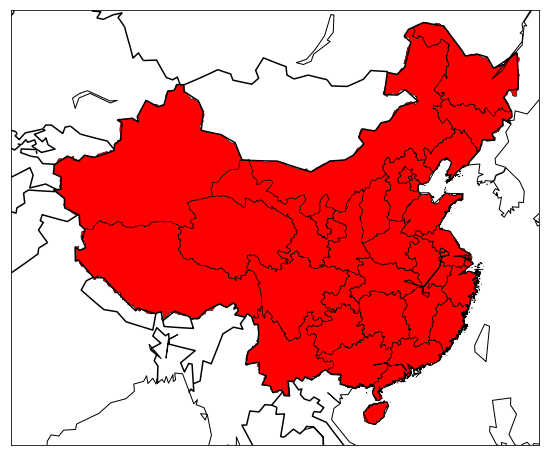

In [19]:
from matplotlib.patches import Polygon

plt.figure(figsize=(16, 8))
# 生成地图对象
m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
# 绘制海岸线
m.drawcoastlines()
# 读取行政区划分shape文件
m.readshapefile('gadm36_CHN_shp/gadm36_CHN_1', 'states', drawbounds=True)

# 上色
# 获取当前绘图画布
ax = plt.gca()
for nshape, seg in enumerate(m.states):
    poly = Polygon(seg, facecolor='r')
    ax.add_patch(poly)

# 绘制国家
m.drawcountries(linewidth=1.5)
plt.show()

第13行plt.gca，函数名看上去很诡异，是因为Python里大量使用了缩写，这个gca就是Get Current Axes的缩写，实际上就是要获得当前图形的座标轴。然后我们开始一个循环，把图形文件中各个省的多边形取出来，给它一个颜色，在这里我们统一放上红色，也就是Red的缩写r，然后把这个多边形放在我们图形的座标轴上，然后就得到了下图

台湾没画出来，在此郑重声明：台湾是中华人民共和国不可分割的领土！加入台湾的Shape文件，然后循环一下

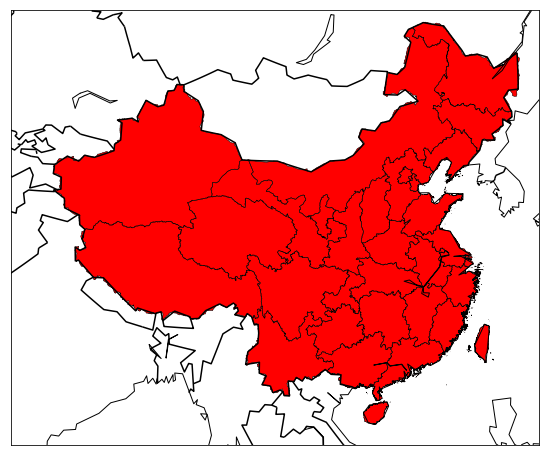

In [21]:
plt.figure(figsize=(16, 8))
# 生成地图对象
m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
# 绘制海岸线
m.drawcoastlines()
# 读取行政区划分shape文件
m.readshapefile('gadm36_CHN_shp/gadm36_CHN_1', 'states', drawbounds=True)

# 上色
# 获取当前绘图画布
ax = plt.gca()
for nshape, seg in enumerate(m.states):
    poly = Polygon(seg, facecolor='r')
    ax.add_patch(poly)
    
m.readshapefile('gadm36_TWN_shp/gadm36_TWN_0', 'taiwan', drawbounds=True)
for nshape, seg in enumerate(m.taiwan):
    poly = Polygon(seg, facecolor='r')
    ax.add_patch(poly)

# 绘制国家
m.drawcountries(linewidth=1.5)
plt.show()

祖国山河一片红~~~

把各个省的名字打出来看一下

安徽
北京
重庆
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福建
福

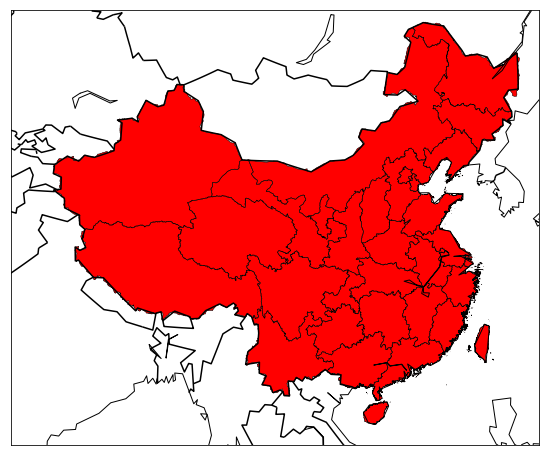

In [45]:
plt.figure(figsize=(16, 8))
# 生成地图对象
m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
# 绘制海岸线
m.drawcoastlines()
# 读取行政区划分shape文件
m.readshapefile('gadm36_CHN_shp/gadm36_CHN_1', 'states', drawbounds=True)

# 上色
# 获取当前绘图画布
ax = plt.gca()
for nshape, seg in enumerate(m.states):
    poly = Polygon(seg, facecolor='r')
    ax.add_patch(poly)
    
# 输出各省名字
# print(len(m.states_info))   # 2020
for shapedict in m.states_info:
    statename = shapedict['NL_NAME_1']
    p = statename.split('|')
    if len(p) > 1:
        s = p[1]
    else:
        s = p[0]
    print(s)
    
m.readshapefile('gadm36_TWN_shp/gadm36_TWN_0', 'taiwan', drawbounds=True)
for nshape, seg in enumerate(m.taiwan):
    poly = Polygon(seg, facecolor='r')
    ax.add_patch(poly)
    
# print(len(m.taiwan_info))   # 108
# print(m.taiwan_info[0].keys())  # dict_keys(['GID_0', 'NAME_0', 'RINGNUM', 'SHAPENUM'])
for shapedict in m.taiwan_info:
    s = shapedict['NAME_0']
    print(s)

# 绘制国家
m.drawcountries(linewidth=1.5)
plt.show()

接下来我们去国家统计局搞点数据(http://www.stats.gov.cn/tjsj/pcsj/rkpc/6rp/indexce.htm) ，第六次全国人口普查数据可以直接下载Excel文件，略作修改，导出成csv文件

In [59]:
import pandas as pd
df = pd.read_csv('chnpop.csv')
df

,地区,合计,家庭户,集体户,人口数,男,女,性别比,小计,男1,女1,性别比1,小计1,男2,女2,性别比2,人每户
0,全国,417722698,401934196,15788502,1332810869,682329104,650481765,104.90,1239981250,627410399,612570851,102.42,92829619,54918705,37910914,144.86,3.09
1,北京,7355291,6680552,674739,19612368,10126430,9485938,106.75,16389723,8173161,8216562,99.47,3222645,1953269,1269376,153.88,2.45
2,天津,3963604,3661992,301612,12938693,6907091,6031602,114.52,10262186,5129604,5132582,99.94,2676507,1777487,899020,197.71,2.80
3,河北,20813492,20395116,418376,71854210,36430286,35423924,102.84,68538709,34552649,33986060,101.67,3315501,1877637,1437864,130.59,3.36
4,山西,10654162,10330207,323955,35712101,18338760,17373341,105.56,33484131,16988087,16496044,102.98,2227970,1350673,877297,153.96,3.24
5,内蒙古,8470472,8205498,264974,24706291,12838243,11868048,108.17,23071690,11725291,11346399,103.34,1634601,1112952,521649,213.35,2.81
6,辽宁,15334912,14994046,340866,43746323,22147745,21598578,102.54,41755874,20956756,20799118,100.76,1990449,1190989,799460,148.97,2.78
7,吉林,9162183,8998492,163691,27452815,13907218,13545597,102.67,26457769,13358390,13099379,101.98,995046,548828,446218,123.00,2.94
8,黑龙江,13192935,13000088,192847,38313991,19426106,18887885,102.85,36884039,18603181,18280858,101.76,1429952,822925,607027,135.57,2.84
9,上海,8893483,8253257,640226,23019196,11854916,11164280,106.19,20593430,10318168,10275262,100.42,2425766,1536748,889018,172.86,2.50


数据也有了，我们终于要开始做一些激动人心的事情了。我们希望根据各省人口的多少用深浅不同的颜色为各个省份染色，那么首先第一步，我们需要选择一个调色板，也就是色彩映射表colormap，为此，matplotlib为你准备了数不胜数的选择，我们随便选择一款国旗色红黄色调的吧

2020


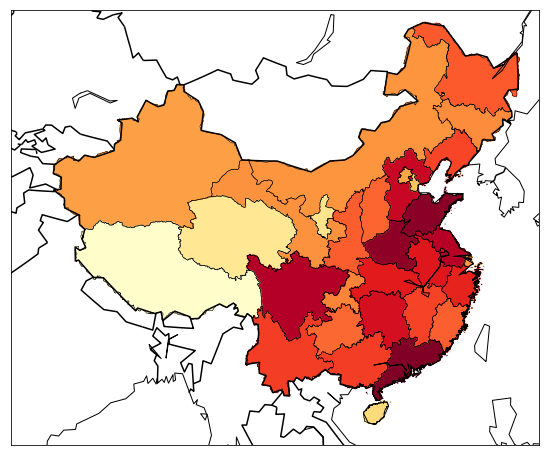

In [66]:
from matplotlib.colors import rgb2hex
import numpy as np

plt.figure(figsize=(16, 8))
# 生成地图对象
m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
# 绘制海岸线
m.drawcoastlines()
# 绘制国家
m.drawcountries(linewidth=1.5)

# 读取行政区划分shape文件
m.readshapefile('gadm36_CHN_shp/gadm36_CHN_1', 'states', drawbounds=True)

df['省名'] = df['地区'].str[:2]
df.set_index('省名', inplace=True)

statenames = []
colors = {}
cmap = plt.cm.YlOrRd
vmax = 100000000
vmin = 3000000

# int(len(m.states_info))    # 2020
for shapedict in m.states_info:
    statename = shapedict['NL_NAME_1']
    p = statename.split('|')
    if len(p) > 1:
        s = p[1]
    else:
        s = p[0]
    s = s[:2]
    
    if s == '黑龍':
        s = '黑龙'
    
    statenames.append(s)
    pop = df['人口数'][s]
    colors[s] = cmap(np.sqrt((pop - vmin) / (vmax - vmin)))[:3]
    
ax = plt.gca()
# print(len(m.states))    # 2020
for nshape, seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)

plt.show()